<a href="https://colab.research.google.com/github/prabhudc/covid-19/blob/master/covid_19_stream_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib import colors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


## Download data
We use the dataset maintained by the John Hopkins University. These datasets along with other data can be found at : https://github.com/CSSEGISandData/COVID-19

The dataset is refreshed once a day.

In [0]:
# Download JHU consolidated time-series
df_cov19_jhu_raw_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_cov19_jhu_raw_confirmed = df_cov19_jhu_raw_confirmed.melt(id_vars=["Province/State", "Country/Region","Lat","Long"],var_name="Date",value_name="Value") # Pivoted date values
df_cov19_jhu_raw_confirmed.loc[:,"Date"] = pd.to_datetime(df_cov19_jhu_raw_confirmed.loc[:,"Date"]) # Date formatted
df_cov19_jhu_raw_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_cov19_jhu_raw_deaths = df_cov19_jhu_raw_deaths.melt(id_vars=["Province/State", "Country/Region","Lat","Long"],var_name="Date",value_name="Value") # Pivoted date values
df_cov19_jhu_raw_deaths.loc[:,"Date"] = pd.to_datetime(df_cov19_jhu_raw_deaths.loc[:,"Date"]) # Date formatted
df_cov19_jhu_raw_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_cov19_jhu_raw_recovered = df_cov19_jhu_raw_recovered.melt(id_vars=["Province/State", "Country/Region","Lat","Long"],var_name="Date",value_name="Value") # Pivoted date values
df_cov19_jhu_raw_recovered.loc[:,"Date"] = pd.to_datetime(df_cov19_jhu_raw_recovered.loc[:,"Date"]) # Date formatted



## Pre-process


The JHU dataset has values recorded at the level of provinces for some countries. For ease of visualization, we roll the data up to country level

In [0]:
# Cumulate the counts across provinces within a country
df_cov19_jhu_select_confirmed = df_cov19_jhu_raw_confirmed.loc[:,["Country/Region","Date","Value"]]
df_cov19_jhu_grouped_confirmed = df_cov19_jhu_select_confirmed.groupby(by = ["Country/Region","Date"]).sum().reset_index()
df_cov19_jhu_grouped_confirmed.columns = ["country","date","count"]

df_cov19_jhu_select_deaths = df_cov19_jhu_raw_deaths.loc[:,["Country/Region","Date","Value"]]
df_cov19_jhu_grouped_deaths = df_cov19_jhu_select_deaths.groupby(by = ["Country/Region","Date"]).sum().reset_index()
df_cov19_jhu_grouped_deaths.columns = ["country","date","count"]

df_cov19_jhu_select_recovered = df_cov19_jhu_raw_recovered.loc[:,["Country/Region","Date","Value"]]
df_cov19_jhu_grouped_recovered = df_cov19_jhu_select_recovered.groupby(by = ["Country/Region","Date"]).sum().reset_index()
df_cov19_jhu_grouped_recovered.columns = ["country","date","count"]

## Ploting

Visualize confirmed cases across all countries

In [0]:
#Setup the colors for further processing
country_list = df_cov19_jhu_raw_confirmed["Country/Region"].unique()
cmap = plt.get_cmap("tab20b",len(country_list))
color_list = [colors.rgb2hex(rgb) for rgb in cmap(np.arange(0,len(country_list)))]
random.shuffle(color_list)

# Set the color map to be referenced in later charts
df_color_map = pd.DataFrame()
df_color_map["country"] = country_list
df_color_map["color"] = color_list

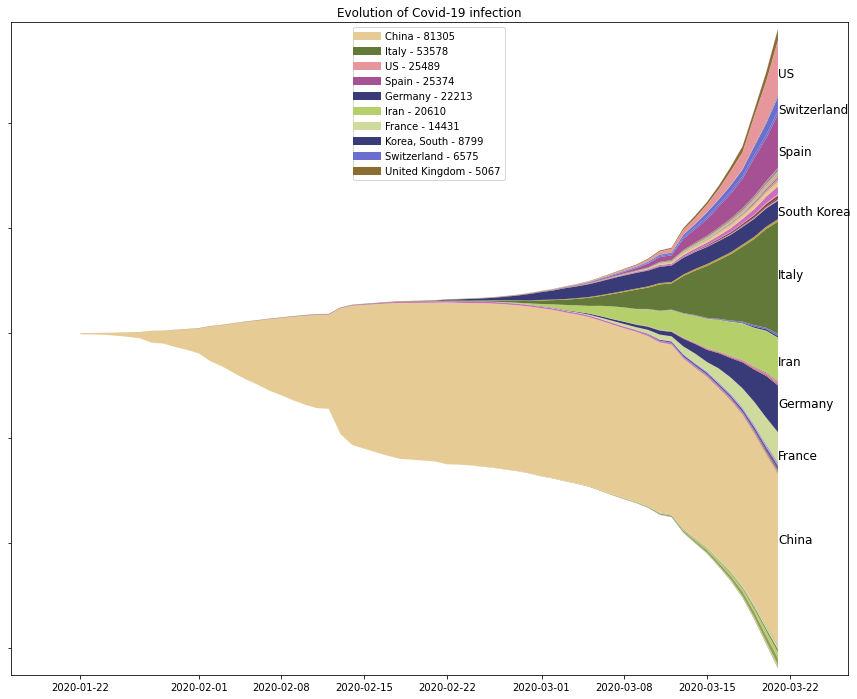

In [284]:
df_cov19_jhu_pivot_confirmed = df_cov19_jhu_grouped_confirmed.pivot(index= "country",columns = "date", values="count").reset_index()

# Fill the plot input values
y = np.array(df_cov19_jhu_pivot_confirmed.iloc[:,1:])
x = df_cov19_jhu_pivot_confirmed.columns[1:]


# Look up the colors defined in the confirmed list
df_confirmed_color = pd.DataFrame(df_cov19_jhu_pivot_confirmed.iloc[:,0])
df_confirmed_color = df_confirmed_color.merge(df_color_map, on="country")
color_list_confirmed = df_confirmed_color.loc[:,"color"]

# Plot the chart
fig, ax = plt.subplots(figsize=(15,12))
ax.stackplot(x,y,baseline='wiggle',colors=color_list_confirmed)

#Setup the legend for top-10
df_cov19_jhu_pivot_confirmed = df_cov19_jhu_pivot_confirmed.sort_values(by=df_cov19_jhu_pivot_confirmed.columns[-1],ascending=False)
top_10_countries = df_cov19_jhu_pivot_confirmed.iloc[0:10,0] + [' - ' + str(elem )for elem in list(df_cov19_jhu_pivot_confirmed.iloc[0:10,-1])]
top_10_colors = df_cov19_jhu_pivot_confirmed.iloc[:10,[0]].merge(df_color_map, on="country").iloc[:,1]
legend_elements = [Line2D([0], [0], color=top_10_colors[i], lw=8, label=list(top_10_countries)[i]) for i in range(0,10)]
ax.legend(handles=legend_elements, loc='upper center')

ax.set_yticklabels("")
ax.set_title("Evolution of Covid-19 infection")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -100000, 'China',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], 26000, 'Italy',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], 122000, 'US',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], 85000, 'Spain',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -35000, 'Germany',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -15000, 'Iran',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -60000, 'France',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], 56000, 'South Korea',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], 105000, 'Switzerland',size="12")
# ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -18000, 'UK',size="12")
ymin, ymax = ax.get_ylim()
ax.label_outer()
plt.margins(0.1,.01)

plt.show()

The recovery rate of patients have not managed to catch-up with the explosion of infected cases. We see this in the next chart displayed along the same scale the chart depicting the infection

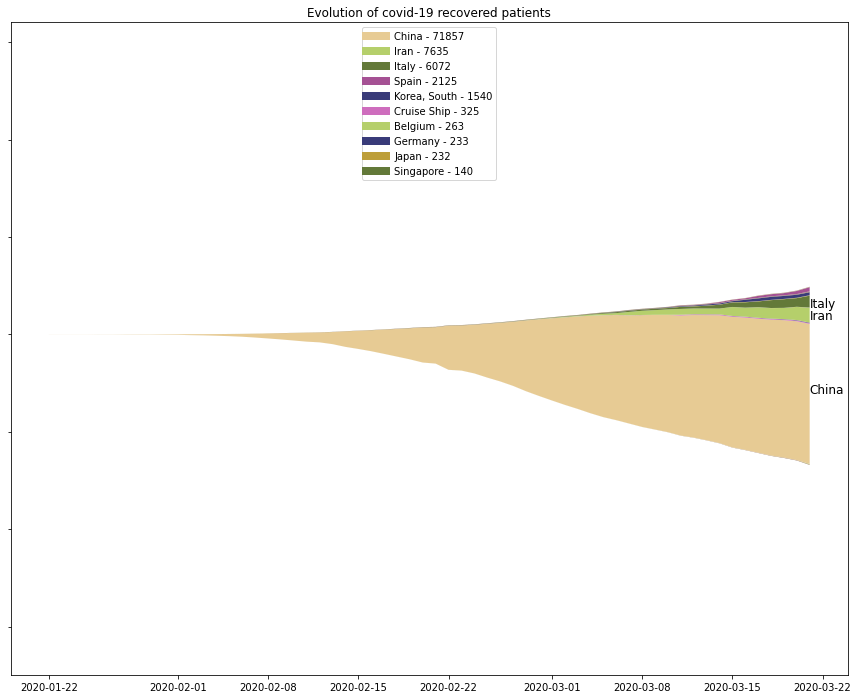

In [285]:
df_cov19_jhu_pivot_recovered = df_cov19_jhu_grouped_recovered.pivot(index= "country",columns = "date", values="count").reset_index()

# Fill the polot specific
y = np.array(df_cov19_jhu_pivot_recovered.iloc[:,1:])
x = df_cov19_jhu_pivot_recovered.columns[1:]
country_labels = df_cov19_jhu_pivot_recovered.iloc[:,0]

# Look up the colors defined in the confirmed list
df_recovered_color = pd.DataFrame(df_cov19_jhu_pivot_recovered.iloc[:,0])
df_recovered_color = df_recovered_color.merge(df_color_map, on="country")
color_list_recovered = df_recovered_color.loc[:,"color"]

# Plot the chart
fig, ax = plt.subplots(figsize=(15,12))
ax.stackplot(x,y,baseline='wiggle',colors=color_list_recovered,labels=top_10_countries)

#Setup the legend for top-10
df_cov19_jhu_pivot_recovered = df_cov19_jhu_pivot_recovered.sort_values(by=df_cov19_jhu_pivot_recovered.columns[-1],ascending=False)
top_10_countries = df_cov19_jhu_pivot_recovered.iloc[0:10,0] + [' - ' + str(elem )for elem in list(df_cov19_jhu_pivot_recovered.iloc[0:10,-1])]
top_10_colors = df_cov19_jhu_pivot_recovered.iloc[:10,[0]].merge(df_color_map, on="country").iloc[:,1]
legend_elements = [Line2D([0], [0], color=top_10_colors[i], lw=8, label=list(top_10_countries)[i]) for i in range(0,10)]
ax.legend(handles=legend_elements, loc='upper center')

ax.set_yticklabels("")
ax.set_ylim(ymin, ymax)
ax.text(df_cov19_jhu_pivot_recovered.columns[-1], -30000, 'China',size="12")
ax.text(df_cov19_jhu_pivot_recovered.columns[-1], 8000, 'Iran',size="12")
ax.text(df_cov19_jhu_pivot_recovered.columns[-1], 14000, 'Italy',size="12")
ax.set_title("Evolution of covid-19 recovered patients")
plt.show()

Although, in no way to meant to undermine the people losing their lives due to this pandemic, we see that the death rate is quite low. May their loved ones find peace!

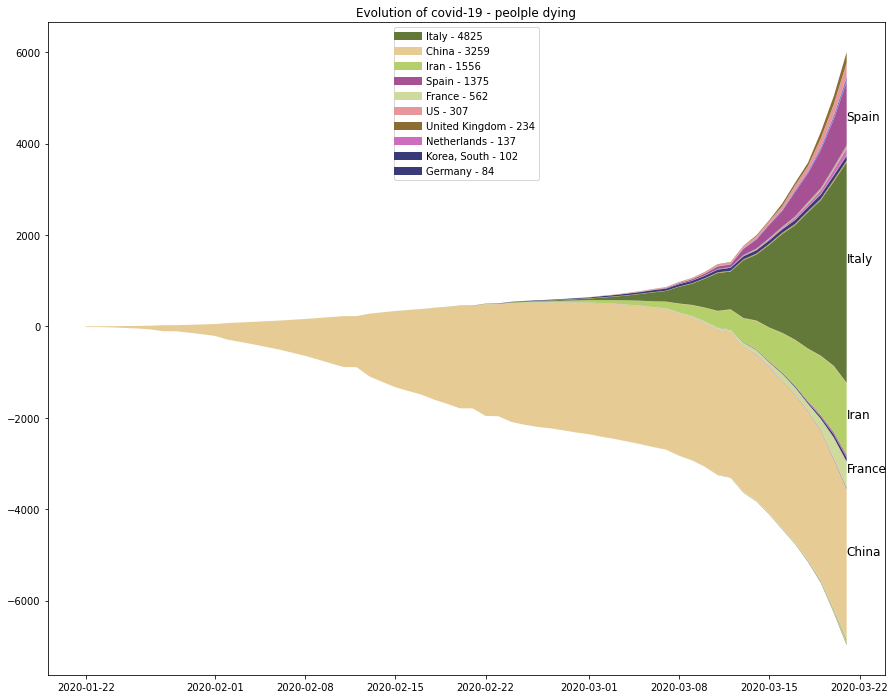

In [292]:
df_cov19_jhu_pivot_deaths = df_cov19_jhu_grouped_deaths.pivot(index= "country",columns = "date", values="count").reset_index()

# Fill the plot specific fields
y = np.array(df_cov19_jhu_pivot_deaths.iloc[:,1:])
x = df_cov19_jhu_pivot_deaths.columns[1:]
country_labels = df_cov19_jhu_pivot_deaths.iloc[:,0]

# Look up the colors defined in the confirmed list
df_death_color = pd.DataFrame(df_cov19_jhu_pivot_deaths.iloc[:,0])
df_death_color = df_death_color.merge(df_color_map, on="country")
color_list_death = df_death_color.loc[:,"color"]

# Plot the chart
fig, ax = plt.subplots(figsize=(15,12))
ax.stackplot(x,y,baseline='wiggle',colors=color_list_death,labels=top_10_countries)

#Setup the legend for top-10
df_cov19_jhu_pivot_deaths = df_cov19_jhu_pivot_deaths.sort_values(by=df_cov19_jhu_pivot_deaths.columns[-1],ascending=False)
top_10_countries = df_cov19_jhu_pivot_deaths.iloc[0:10,0] + [' - ' + str(elem )for elem in list(df_cov19_jhu_pivot_deaths.iloc[0:10,-1])]
top_10_colors = df_cov19_jhu_pivot_deaths.iloc[:10,[0]].merge(df_color_map, on="country").iloc[:,1]
legend_elements = [Line2D([0], [0], color=top_10_colors[i], lw=8, label=list(top_10_countries)[i]) for i in range(0,10)]
ax.legend(handles=legend_elements, loc='upper center')

# ax.set_yticklabels("")
# ax.set_ylim(ymin, ymax)
ax.text(df_cov19_jhu_pivot_deaths.columns[-1], -5000, 'China',size="12")
ax.text(df_cov19_jhu_pivot_deaths.columns[-1], 1400, 'Italy',size="12")
ax.text(df_cov19_jhu_pivot_deaths.columns[-1], -2000, 'Iran',size="12")
ax.text(df_cov19_jhu_pivot_deaths.columns[-1], 4500, 'Spain',size="12")
ax.text(df_cov19_jhu_pivot_deaths.columns[-1], -3200, 'France',size="12")
ax.set_title("Evolution of covid-19 - peolple dying")
plt.show()

As China has seen significant improvement, other countries, especially European nations now become the new epicenter. 

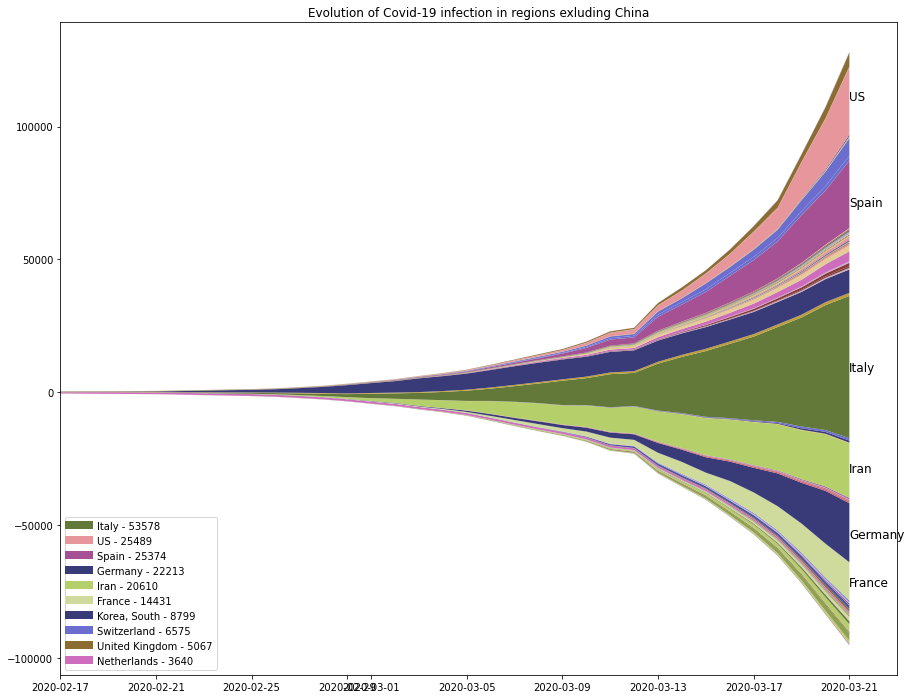

In [267]:

df_cov19_jhu_pivot_confirmed = df_cov19_jhu_grouped_confirmed.pivot(index= "country",columns = "date", values="count").reset_index()
df_nonchina_confirmed = df_cov19_jhu_pivot_confirmed[df_cov19_jhu_pivot_confirmed.loc[:,"country"] != "China"]

y = np.array(df_nonchina_confirmed.iloc[:,1:])
x = df_nonchina_confirmed.columns[1:]
country_labels = df_nonchina_confirmed.iloc[:,0]

# Look up the colors defined in the confirmed list
df_nonchina_color = pd.DataFrame(df_nonchina_confirmed.iloc[:,0])
df_nonchina_color = df_nonchina_color.merge(df_color_map, on="country")
color_list_nonchina = df_nonchina_color.loc[:,"color"]

fig, ax = plt.subplots(figsize=(15,12))
ax.stackplot(x,y,baseline='wiggle',colors=color_list_nonchina,labels=top_10_countries)
ax.set_xlim('2020-02-17', '2020-03-23')

#Setup the legend for top-10
df_nonchina_confirmed = df_nonchina_confirmed.sort_values(by=df_nonchina_confirmed.columns[-1],ascending=False)
top_10_countries = df_nonchina_confirmed.iloc[0:10,0] + [' - ' + str(elem )for elem in list(df_nonchina_confirmed.iloc[0:10,-1])]
top_10_colors = df_nonchina_confirmed.iloc[:10,[0]].merge(df_color_map, on="country").iloc[:,1]
legend_elements = [Line2D([0], [0], color=top_10_colors[i], lw=8, label=list(top_10_countries)[i]) for i in range(0,10)]
ax.legend(handles=legend_elements, loc='lower left')

# ax.set_yticklabels("")
ax.set_title("Evolution of Covid-19 infection in regions exluding China")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], 8000, 'Italy',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], 110000, 'US',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], 70000, 'Spain',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -55000, 'Germany',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -30000, 'Iran',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -73000, 'France',size="12")
# ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -35000, 'S. Korea',size="12")
# ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -27000, 'US',size="12")
# ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -22500, 'Switzerland',size="12")
# ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -19500, 'UK',size="12")
# ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -17000, 'Netherlands',size="12")
plt.show()

## Rate of change of infection

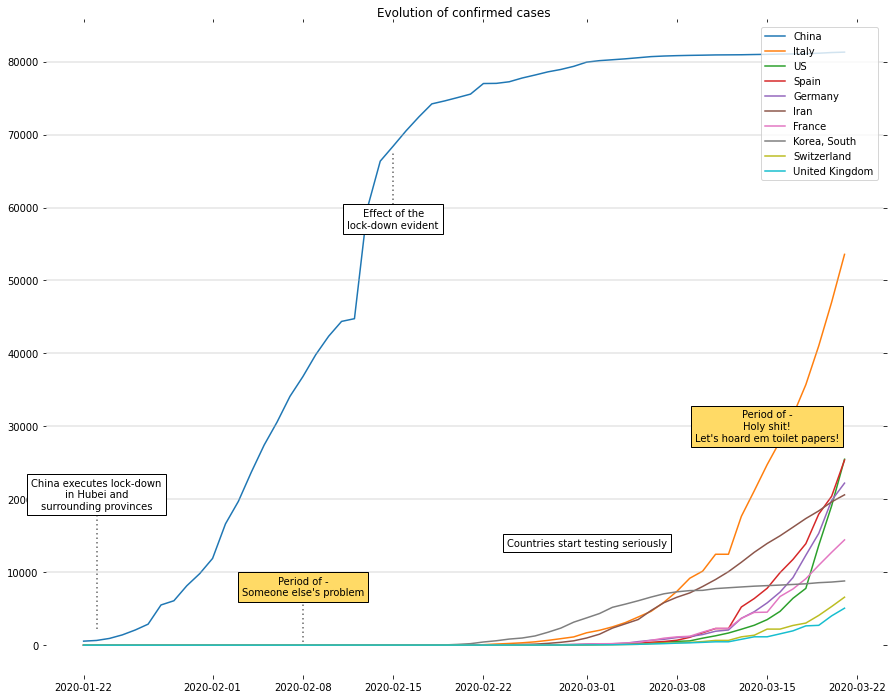

In [295]:
# Get the current top 10 countries
df_confirmed_pivoted =  df_cov19_jhu_grouped_confirmed.pivot(index="country",columns="date",values="count")
df_cov19_jhu_pivot_confirmed = df_cov19_jhu_pivot_confirmed.sort_values(by=df_cov19_jhu_pivot_confirmed.columns[-1],ascending=False)
top_10_countries = df_cov19_jhu_pivot_confirmed.iloc[:10,0]

#Plotting
fig, ax = plt.subplots(figsize=(15,12))
for country in list(top_10_countries):
  ax.plot(df_confirmed_pivoted.loc[country,:], label=country) 
china_lockdown_dt = '2020-01-23'
china_lockdown_effect_dt = '2020-02-15'

ax.axvline(x=china_lockdown_dt,ymin=0.07,ymax=0.3,c=(40/255, 40/255, 40/255), alpha=0.7,dashes=[1.0,2.0])
ax.text(x=china_lockdown_dt,y=df_confirmed_pivoted.loc["China",china_lockdown_dt]+20000,s="China executes lock-down\nin Hubei and\nsurrounding provinces",bbox=dict(facecolor='white'),horizontalalignment='center',verticalalignment='center')

ax.axvline(x=china_lockdown_effect_dt,ymin=0.7,ymax=.8,c=(40/255, 40/255, 40/255), alpha=0.7,animated=True,dashes=[1.0,2.0])
ax.text(x=china_lockdown_effect_dt,y=df_confirmed_pivoted.loc["China",china_lockdown_effect_dt]-10000,s="Effect of the\nlock-down evident",bbox=dict(facecolor='white'),horizontalalignment='center',verticalalignment='center')

ax.axvline(x='2020-02-08',ymin=0.05,ymax=.12,c=(40/255, 40/255, 40/255), alpha=0.7,animated=True,dashes=[1.0,2.0])
ax.text(x='2020-02-08',y=8000,s="Period of -\nSomeone else's problem",bbox=dict(facecolor='#ffda66'),horizontalalignment='center',verticalalignment='center')
ax.text(x='2020-03-15',y=30000,s="Period of -\nHoly shit!\nLet's hoard em toilet papers!",bbox=dict(facecolor='#ffda66'),horizontalalignment='center',verticalalignment='center')

# Testing seriously
testing_dt = '2020-03-01'
ax.text(x=testing_dt,y=14000,s="Countries start testing seriously",bbox=dict(facecolor='white'),horizontalalignment='center',verticalalignment='center')


ax.set_title("Evolution of confirmed cases")
ax.legend(loc='upper right')
ax.tick_params(bottom="off", top="off", left="off", right="off")
dummy = [ax.spines[elem].set_visible(False) for elem in ax.spines.keys()]
for i in range(1,9):
  ax.axhline(i*10000, c=(171/255, 171/255, 171/255), alpha=0.3)
plt.show()

Repeating the above analysis exclusing China which is well on its way to recovery.

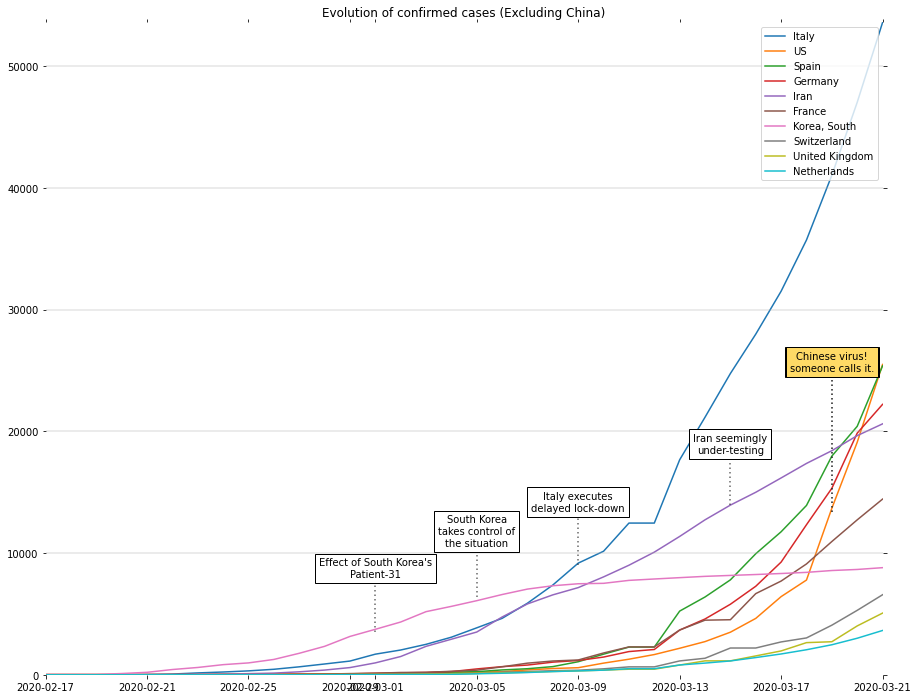

In [293]:
# Get the current top 10 countries
df_confirmed_pivoted =  df_cov19_jhu_grouped_confirmed.pivot(index="country",columns="date",values="count")
df_cov19_jhu_pivot_confirmed = df_cov19_jhu_pivot_confirmed.sort_values(by=df_cov19_jhu_pivot_confirmed.columns[-1],ascending=False)
top_10_countries = df_cov19_jhu_pivot_confirmed[df_cov19_jhu_pivot_confirmed.loc[:,"country"] != "China"].iloc[:10,0]
   
# Plotting
fig, ax = plt.subplots(figsize=(15,12))
for country in list(top_10_countries):
  ax.plot(df_confirmed_pivoted.loc[country,:], label=country) 
ax.legend(loc='upper right')
ax.set_ylim(0,max(df_confirmed_pivoted[df_confirmed_pivoted.index.isin(top_10_countries)].iloc[:,-1]))
# ax.set_xlim('2020-02-17','2020-03-22')
ax.set_xlim('2020-02-17',max(df_confirmed_pivoted.columns))
ax.tick_params(bottom="off", top="off", left="off", right="off")
dummy = [ax.spines[elem].set_visible(False) for elem in ax.spines.keys()]
for i in range(1,9):
  ax.axhline(i*10000, c=(171/255, 171/255, 171/255), alpha=0.3)

# Depict Italy's lock-down
italy_lockdow_dt = '2020-03-09'
ax.axvline(x=italy_lockdow_dt,ymin=0.168,ymax=.25,c=(40/255, 40/255, 40/255), alpha=0.7,animated=True,dashes=[1.0,2.0])
ax.text(x=italy_lockdow_dt,y=df_confirmed_pivoted.loc["Italy",italy_lockdow_dt]+5000,s="Italy executes\ndelayed lock-down",bbox=dict(facecolor='white'),horizontalalignment='center',verticalalignment='center')

# Depict South Korea's patient 31
patient_31_dt = '2020-03-01'
ax.axvline(x=patient_31_dt,ymin=0.065,ymax=.18,c=(40/255, 40/255, 40/255), alpha=0.7,animated=True,dashes=[1.0,2.0])
ax.text(x=patient_31_dt,y=df_confirmed_pivoted.loc["Korea, South",patient_31_dt]+5000,s="Effect of South Korea's\nPatient-31",bbox=dict(facecolor='white'),horizontalalignment='center',verticalalignment='center')

# South Korea
south_k_gets_better_dt = '2020-03-05'
ax.axvline(x=south_k_gets_better_dt,ymin=0.12,ymax=.22,c=(40/255, 40/255, 40/255), alpha=0.7,animated=True,dashes=[1.0,2.0])
ax.text(x=south_k_gets_better_dt,y=df_confirmed_pivoted.loc["Korea, South",south_k_gets_better_dt]+5700,s="South Korea\ntakes control of\nthe situation",bbox=dict(facecolor='white'),horizontalalignment='center',verticalalignment='center')

# Depict Iran's case of under-testing
iran_low_rate_dt = '2020-03-15'
ax.axvline(x=iran_low_rate_dt,ymin=0.26,ymax=.35,c=(40/255, 40/255, 40/255), alpha=0.7,animated=True,dashes=[1.0,2.0])
ax.text(x=iran_low_rate_dt,y=df_confirmed_pivoted.loc["Iran",iran_low_rate_dt]+5000,s="Iran seemingly\nunder-testing",bbox=dict(facecolor='white'),horizontalalignment='center',verticalalignment='center')


# Chinese virus
chinese_virus_dt = '2020-03-19'
ax.axvline(x=chinese_virus_dt,ymin=0.25,ymax=.5,c=(40/255, 40/255, 40/255), alpha=0.7,animated=True,dashes=[1.0,2.0])
ax.text(x=chinese_virus_dt,y=df_confirmed_pivoted.loc["US",chinese_virus_dt]+12000,s="Chinese virus!\nSomeone calls it.",bbox=dict(facecolor='white'),horizontalalignment='center',verticalalignment='center')

# Testing
testing_dt = '2020-03-19'
ax.axvline(x=chinese_virus_dt,ymin=0.25,ymax=.5,c=(40/255, 40/255, 40/255), alpha=0.7,animated=True,dashes=[1.0,2.0])
ax.text(x=chinese_virus_dt,y=df_confirmed_pivoted.loc["US",chinese_virus_dt]+12000,s="Chinese virus!\nsomeone calls it.",bbox=dict(facecolor='#ffda66'),horizontalalignment='center',verticalalignment='center')


ax.set_title("Evolution of confirmed cases (Excluding China)")
plt.show()